In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from math import ceil
import random as rd

In [2]:
data = pd.read_csv("C:\DOC\info\ENSAE-Python\winemag-data_first150k.csv")

In [3]:
data.columns
data = data.drop('Unnamed: 0', axis = 1)

In [4]:
data['country'].nunique()
data['region_2'].nunique()
data['province'].count()

150925

In [5]:
data.describe()

,points,price
count,150930.000000,137235.000000
mean,87.888418,33.131482
std,3.222392,36.322536
min,80.000000,4.000000
25%,86.000000,16.000000
50%,88.000000,24.000000
75%,90.000000,40.000000
max,100.000000,2300.000000


In [6]:
data.isnull().sum()

country            5
description        0
designation    45735
points             0
price          13695
province           5
region_1       25060
region_2       89977
variety            0
winery             0
dtype: int64

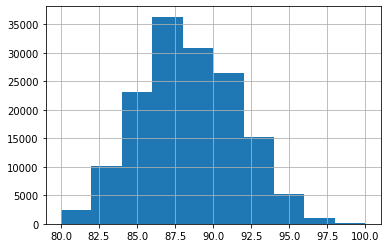

In [7]:
fig = data['points'].hist()
plt.show()

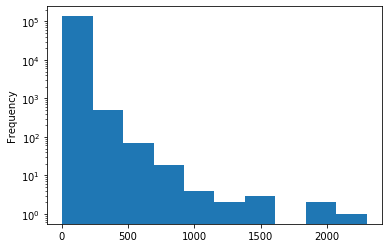

In [8]:
fig = data['price'].plot(kind = 'hist', logy=True)
plt.show()

In [9]:
data['price'][4]

66.0

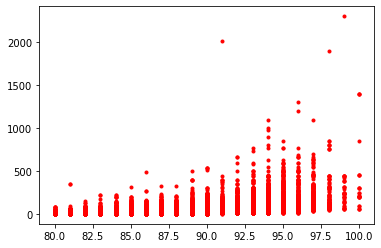

In [10]:
plt.plot(data['points'], data['price'], 'r.')

In [11]:
priceForPoint = data.groupby(by="points").mean()

In [12]:
#PriceForPoint donne la moyenne du prix de la bouteille pour un nbr de point donné

[]

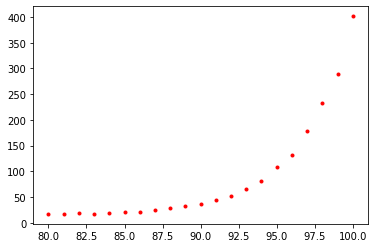

In [13]:
plt.plot(priceForPoint.index, priceForPoint , 'r.')
plt.plot()

[]

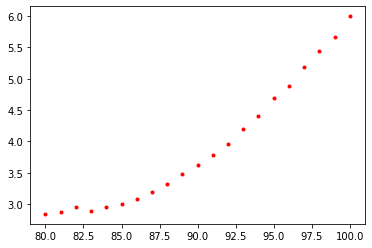

In [14]:
plt.plot(priceForPoint.index, np.log(priceForPoint) , 'r.')
plt.plot()

In [15]:
countries = data[ ["country", "winery"] ].groupby(by="country").count().sort_values(by="winery")[::-1]
countries.count()

winery    48
dtype: int64

In [16]:
data.index

RangeIndex(start=0, stop=150930, step=1)

In [17]:
data.columns

Index(['country', 'description', 'designation', 'points', 'price', 'province',
       'region_1', 'region_2', 'variety', 'winery'],
      dtype='object')

In [18]:
countries_price = data[ ["country", "price"]].groupby(by ="country").mean()

In [19]:
data[data["country"]== 'Canada']["price"].mean()

34.628865979381445

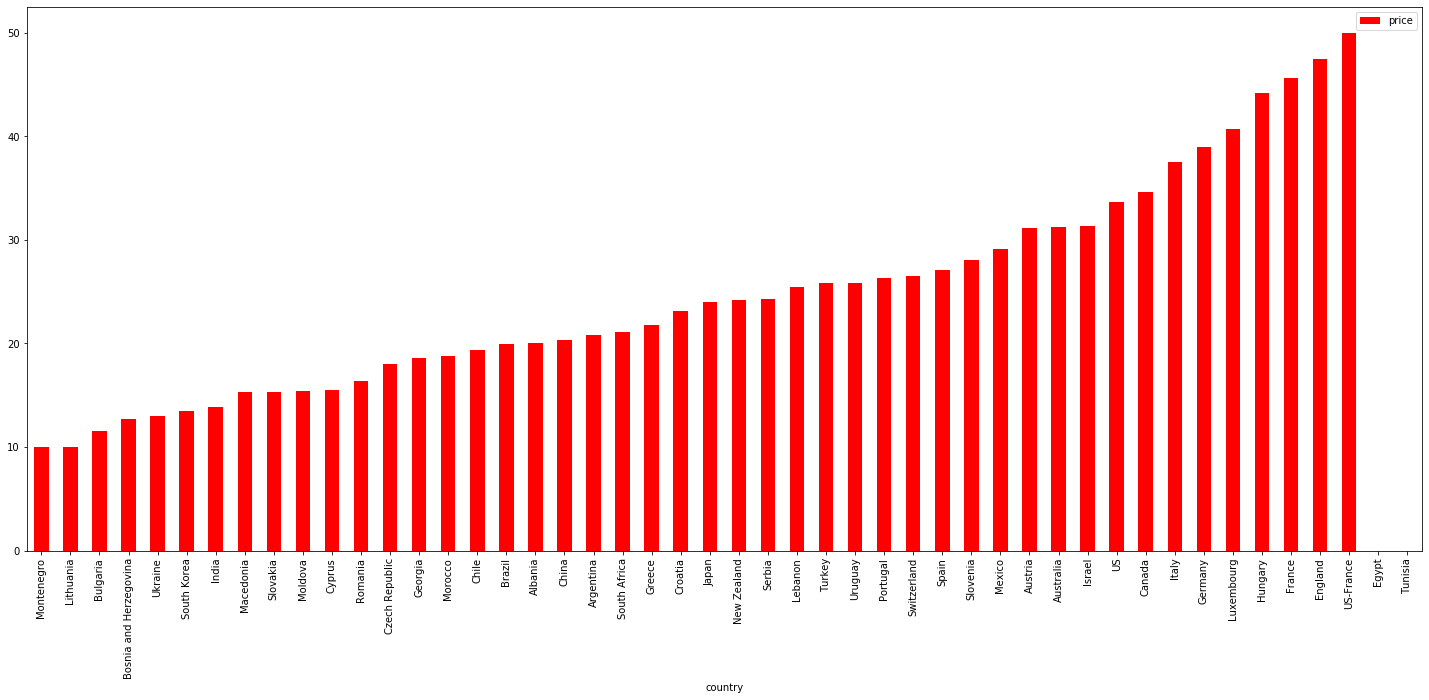

In [20]:
countries_price.sort_values('price').plot(kind = "bar", figsize = (25,10), color = 'red')

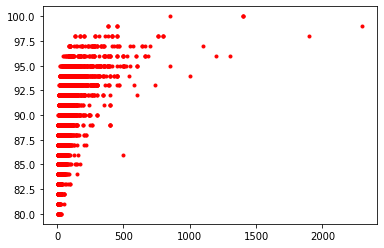

In [21]:
dfr=data[data["country"] == 'France']
plt.plot(dfr['price'],dfr['points'], 'r.')

In [22]:
dfr_max=dfr[dfr['price']> dfr['price'].quantile( q = 0.99)]

In [23]:
dfr_max=dfr_max[['region_1','winery']]

In [24]:
dfr_max.count()

region_1    148
winery      148
dtype: int64

In [25]:
dfr_max_winery = dfr_max.groupby('region_1').count().sort_values(by="winery")[::-1]
dfr_max_winery.head()

,winery
region_1,
Champagne,37
Pessac-Léognan,12
Montrachet,11
Chevalier-Montrachet,11
Pauillac,11


In [26]:
#Faisons un peu de RNN:

In [27]:
data.head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


In [409]:
data_10000 = data.sample(frac = 0.1, random_state = 1)
X = data_10000['description']
Y = data_10000['points']

In [410]:
Y.mean()
Y.var()
print("Y n'est pas centrée On s'en occupe pour faciliter le traitement ensuite")

Y n'est pas centrée On s'en occupe pour faciliter le traitement ensuite


In [411]:
Y_corr= (Y-Y.mean())

In [412]:
mean=Y_corr.mean()
var=Y_corr.var()
print("Variance:",var, "Moyenne", mean)

Variance: 10.47991993767967 Moyenne 1.1752460647661262e-14


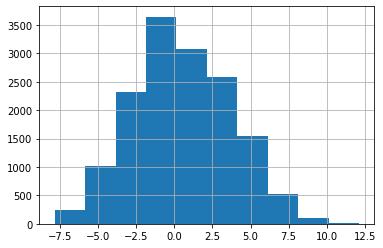

In [413]:
fig = Y_corr.hist()
plt.show()

In [414]:
#On va essayer de prédire, en fonction de la description, un score en séparant en 5 parties qui sera ensuite ramené sur 100.

In [415]:
groupe = (max(Y_corr)-min(Y_corr))/5
print("on va faire 5 catégories de taille", groupe+0.001)

on va faire 5 catégories de taille 4.001


In [416]:
maxLen = len(max(X, key=len).split())

In [417]:
Y_corr = np.array(Y_corr)
mini = min(Y_corr)
for idx in range(len(Y_corr)):
    Y_corr[idx] = abs(Y_corr[idx] - mini)//4.001
    

In [418]:
Y_corr = np.array(Y_corr, dtype=int)
max(Y_corr)

4

In [419]:
def convert_to_one_hot(vecteur):
    oh = np.zeros((vecteur.size, int(vecteur.max()+1)))
    oh[np.arange(vecteur.size),vecteur] = 1
    return oh

In [420]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

In [421]:
X = np.array(X)
X_train,X_test,Y_train,Y_test=train_test_split(X,Y_corr,test_size=0.2)

In [423]:
len(X)-len(X_train)

3019

In [424]:
import csv

def read_glove_vecs(glove_file):
    with open(glove_file, 'r', encoding='utf-8') as f:
        words = set()
        word_to_vec_map = {}
        for line in f:
            line = line.strip().split()
            curr_word = line[0]
            words.add(curr_word)
            word_to_vec_map[curr_word] = np.array(line[1:], dtype=np.float64)
        
        i = 1
        words_to_index = {}
        index_to_words = {}
        for w in sorted(words):
            words_to_index[w] = i
            index_to_words[i] = w
            i = i + 1
    return words_to_index, index_to_words, word_to_vec_map

In [425]:
word_to_index, index_to_word, word_to_vec_map = read_glove_vecs('glove.6B.50d.txt')

In [426]:
def sentence_to_avg(sentence, word_to_vec_map):
 
    # Step 1: Split sentence into list of lower case words (≈ 1 line)
    words = sentence.lower().split()

    # Initialize the average word vector, should have the same shape as your word vectors.
    avg = np.zeros(50)
    
    # Step 2: average the word vectors. You can loop over the words in the list "words".
    total = 0
    for w in words:
        while w not in word_to_vec_map.keys():
            if w[1:] in word_to_vec_map.keys():
                w = w[1:]
            else:
                w = w[:-1]
        total += word_to_vec_map[w]
    avg = total/len(words)
    
    ### END CODE HERE ###
    
    return avg

In [427]:
def softmax(x):
    """Compute softmax values for each sets of scores in x."""
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum()


def model(X, Y, word_to_vec_map, learning_rate = 0.01, num_iterations = 400):

    m = Y.shape[0]                          # number of training examples
    n_y = 5                                 # number of classes  
    n_h = 50                                # dimensions of the GloVe vectors 
    
    # Initialize parameters using Xavier initialization
    W = np.random.randn(n_y, n_h) / np.sqrt(n_h)
    b = np.zeros((n_y,)) 
    
    # Convert Y to Y_onehot with n_y classes
    Y_oh = convert_to_one_hot(Y) 
    
    print(Y_oh[:10])
    # Optimization loop
    for t in range(num_iterations): # Loop over the number of iterations
        for i in range(m):          # Loop over the training examples
            
            # Average the word vectors of the words from the i'th training example
            avg = sentence_to_avg(X[i], word_to_vec_map)

            # Forward propagate the avg through the softmax layer
            z = np.dot(W,avg) + b
            a = softmax(z)

            # Compute cost using the i'th training label's one hot representation and "A" (the output of the softmax)
            cost = - np.sum(Y_oh*np.log(a))
            
            # Compute gradients 
            dz = a - Y_oh[i]
            dW = np.dot(dz.reshape(n_y,1), avg.reshape(1, n_h))
            db = dz

            # Update parameters with Stochastic Gradient Descent
            W = W - learning_rate * dW
            b = b - learning_rate * db
        
        if t % 100 == 0:
            print("Epoch: " + str(t) + " --- cost = " + str(cost))
            pred = predict(X, Y, W, b, word_to_vec_map)

    return pred, W, b

In [428]:
def predict(X, Y, W, b, word_to_vec_map):
    """
    Given X (sentences) and Y (emoji indices), predict emojis and compute the accuracy of your model over the given set.
    
    Arguments:
    X -- input data containing sentences, numpy array of shape (m, None)
    Y -- labels, containing index of the label emoji, numpy array of shape (m, 1)
    
    Returns:
    pred -- numpy array of shape (m, 1) with your predictions
    """
    m = X.shape[0]
    pred = np.zeros((m, 1))
    
    for j in range(m):                       # Loop over training examples
        
        # Split jth test example (sentence) into list of lower case words
        words = X[j].lower().split()
        
        # Average words' vectors
        avg = np.zeros((50,))
        for w in words:
            while w not in word_to_vec_map.keys():
                if w[1:] in word_to_vec_map.keys():
                    w = w[1:]
                else:
                    w = w[:-1]
            avg += word_to_vec_map[w]
        avg = avg/len(words)

        # Forward propagation
        Z = np.dot(W, avg) + b
        A = softmax(Z)
        pred[j] = np.argmax(A)
        
    print("Accuracy: "  + str(np.mean((pred[:] == Y.reshape(Y.shape[0],1)[:]))))
    
    return pred

In [472]:
pred, W, b = model(X_train, Y_train, word_to_vec_map)
print(pred)

IndexError: arrays used as indices must be of integer (or boolean) type

In [430]:
print("Training set:")
pred_train = predict(X_train, Y_train, W, b, word_to_vec_map)
print('Test set:')
pred_test = predict(X_test, Y_test, W, b, word_to_vec_map)

Training set:
Accuracy: 0.5385953288056982
Test set:
Accuracy: 0.5336204041073203


In [ ]:
#On se retrouve avec une accuracy de 50... ce qui est mieux que le hasard (5 catégories) mais pas encore optimal
#On va utiliser un algo de LTSM pour pouvoir cette fois ci prendre en compte l'ordre des éléments dans la phrase

In [442]:
#Quelques test
idx = rd.randint(0,len(X))
X[idx],Y_corr[idx], idx

("One of the more dependable bottlings from Napa, the '03 is a lovely wine. Rich and balanced, it offers intense cassis, cherry-pie filling and coffee flavors, with a delicious overlay of new oak. The mountain tannins are firm and dusty, but very finely structured, ripe and sweet. Beautiful now, and should develop well for the next eight years or so.",
 3,
 7225)

In [446]:
X_my_sentences = np.array(["I love that wine, it is so tasteful. A great success to see in the future"])
Y_my_labels = np.array([[3]])
pred = predict(X_my_sentences, Y_my_labels , W, b, word_to_vec_map)
pred

Accuracy: 1.0


In [450]:
X_my_sentences = np.array(["I love that wine , it is so tasteful. A great success ! love love love love"])
Y_my_labels = np.array([[4]])
pred = predict(X_my_sentences, Y_my_labels , W, b, word_to_vec_map)
pred

Accuracy: 1.0


array([[4.]])

In [451]:
#Regardons à partir d'une matrice de confusion ce qui pose problème

In [452]:
def plot_confusion_matrix(y_actu, y_pred, title='Confusion matrix', cmap=plt.cm.gray_r):
    
    df_confusion = pd.crosstab(y_actu, y_pred.reshape(y_pred.shape[0],), rownames=['Actual'], colnames=['Predicted'], margins=True)
    
    df_conf_norm = df_confusion / df_confusion.sum(axis=1)
    
    plt.matshow(df_confusion, cmap=cmap) # imshow
    #plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(df_confusion.columns))
    plt.xticks(tick_marks, df_confusion.columns, rotation=45)
    plt.yticks(tick_marks, df_confusion.index)
    #plt.tight_layout()
    plt.ylabel(df_confusion.index.name)
    plt.xlabel(df_confusion.columns.name)

In [454]:
Y_test.shape

(3019,)

Predicted  0.0   1.0   2.0  3.0   All
Actual                               
0          126   309    35    0   470
1           73   922   339    0  1334
2            5   398   552    8   963
3            0    49   182   11   242
4            0     0    10    0    10
All        204  1678  1118   19  3019


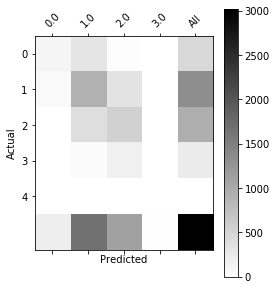

In [455]:
print(pd.crosstab(Y_test, pred_test.reshape(3019,), rownames=['Actual'], colnames=['Predicted'], margins=True))
plot_confusion_matrix(Y_test, pred_test)

In [456]:
#Problème : pas assez de '4' pour que l'algo le prédise..., les classes sont trop centrées sur 3 et 4. Il nous faut une refonte des groupes.

In [496]:
quant = Y.quantile([0.2,0.4,0.6,0.8,1])

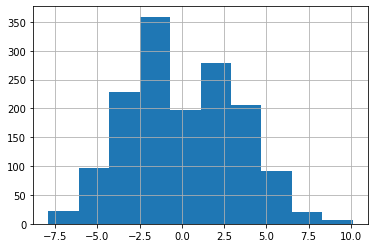

In [497]:
data_1000 = data.sample(frac = 0.01, random_state = 1)
X = data_1000['description']
Y = data_1000['points']

Y_corr= Y-Y.mean()
quant = quant - Y.mean()
fig = Y_corr.hist()
plt.show()

Y_corr = np.array(Y_corr)
for idx in range(len(Y_corr)):
    if Y_corr[idx] <= quant[0.2]:
        Y_corr[idx] = 0
    elif Y_corr[idx] <= quant[0.4]:
        Y_corr[idx] = 1
    elif Y_corr[idx] <= quant[0.6]:
        Y_corr[idx] = 2
    elif Y_corr[idx] <= quant[0.8]:
        Y_corr[idx] = 3
    else:
        Y_corr[idx] = 4

In [498]:
X = np.array(X)
Y_corr = np.array(Y_corr, dtype=int)
X_train,X_test,Y_train,Y_test=train_test_split(X,Y_corr,test_size=0.2)


In [499]:
pred, W_1, b_1 = model(X_train, Y_train, word_to_vec_map)
print(pred)

[[0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0.]]
Epoch: 0 --- cost = 1975.319195595971
Accuracy: 0.2444076222038111
Epoch: 100 --- cost = 2601.805941874836
Accuracy: 0.39188069594034797
Epoch: 200 --- cost = 2660.0546527054967
Accuracy: 0.4009942004971003
Epoch: 300 --- cost = 2670.3054980463667
Accuracy: 0.4009942004971003
[[2.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]


In [502]:
print("Training set:")
pred_train = predict(X_train, Y_train, W_1, b_1, word_to_vec_map)
print('Test set:')
pred_test = predict(X_test, Y_test, W_1, b_1, word_to_vec_map)


Training set:
Accuracy: 0.4067937033968517
Test set:
Accuracy: 0.3344370860927152


Predicted  0.0  1.0  2.0  3.0  4.0  All
Actual                                 
0           55   10    0    4    2   71
1           34   18    2    3    5   62
2           23   18    3    9   12   65
3           14   19    5    8   13   59
4            5   12    4    7   17   45
All        131   77   14   31   49  302


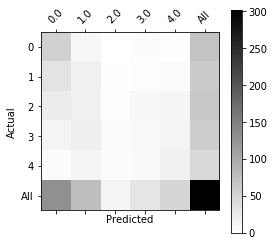

In [503]:
print(pd.crosstab(Y_test, pred_test.reshape(302,), rownames=['Actual'], colnames=['Predicted'], margins=True))
plot_confusion_matrix(Y_test, pred_test)

In [ ]:
#Mieux que le hasard certes mais toujours pas fou, on va tenter le LSTM